In [31]:
# # Import libraries
# import numpy as np 
# from typing import Optional
# import copy
# from collections import defaultdict
# from collections import deque

# Backtracking

### Permutation / Combination Problems

**Example 1: 46. Permutations**

Given an array nums of distinct integers, return all the possible permutations in any order.

For example, given nums = [1, 2, 3], return [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]].

In [6]:
nums = [1, 2, 3]
answer = [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

def find_all_permutations(nums):

    len_nums = len(nums)
    all_permutations = []

    def add_number_or_return_permutation(current_permutation):

        if len(current_permutation) == len_nums:
            all_permutations.append(current_permutation[:])
            # base case: permutation contains all the numbers => complete the permutation

        for num in nums:
            if num not in current_permutation: # could use a seen set instead for efficiency 
                current_permutation.append(num)
                add_number_or_return_permutation(current_permutation) # modify in place
                current_permutation.pop()

    current_permutation = []
    add_number_or_return_permutation(current_permutation)

    return all_permutations

answer = find_all_permutations(nums)
print(answer)


[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


**Example 2: 78. Subsets**

Given an integer array nums of unique elements, return all subsets in any order without duplicates.

For example, given nums = [1, 2, 3], return [[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]

In [16]:
nums = [1, 2, 3]
answer = [[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]

def find_all_subsets(nums):
    
    list_of_subsets = []

    def expand_or_return_subset(current_subset):

        if current_subset not in list_of_subsets:
            list_of_subsets.append(current_subset.copy())

        for num in nums:
            if num not in current_subset:
                current_subset.add(num)
                expand_or_return_subset(current_subset)
                current_subset.remove(num)

    current_subset = set()
    expand_or_return_subset(current_subset)

    subsets_as_lists = [list(x) for x in list_of_subsets]

    return subsets_as_lists

answer = find_all_subsets(nums)
print(answer)

# More efficient to loop over a ragged array: 

# for j in range(i, len(nums)):
#     curr.append(nums[j])
#     backtrack(curr, j + 1)
#     curr.pop()

[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]


Example 3: 77. Combinations

Given two integers n and k, return all combinations of k numbers out of the range [1, n] in any order.

For example, given n = 4, k = 2, return [[2,4],[3,4],[2,3],[1,2],[1,3],[1,4]].

In [24]:
n = 4
k = 2
answer = [[2,4],[3,4],[2,3],[1,2],[1,3],[1,4]]

def return_all_k_combinations(n, k):

    all_combos = []

    def expand_or_return_combo(current_combo, i):

        if len(current_combo) == k:
            all_combos.append(current_combo[:])

        for num in range(i, n + 1):
            if num not in current_combo:
                current_combo.append(num)
                expand_or_return_combo(current_combo, i + 1)
                current_combo.pop()

    current_combo = []
    expand_or_return_combo(current_combo, 1)

    return all_combos

answer = return_all_k_combinations(n, k)
print(answer)

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]


**797. All Paths From Source to Target**
Medium

Given a directed acyclic graph (DAG) of n nodes labeled from 0 to n - 1, find all possible paths from node 0 to node n - 1 and return them in any order.

The graph is given as follows: graph[i] is a list of all nodes you can visit from node i (i.e., there is a directed edge from node i to node graph[i][j]).

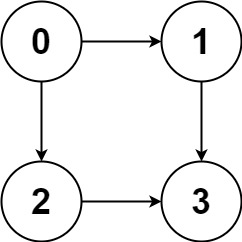

Example 1:


Input: graph = [[1,2],[3],[3],[]]
Output: [[0,1,3],[0,2,3]]
Explanation: There are two paths: 0 -> 1 -> 3 and 0 -> 2 -> 3.

In [9]:
def find_all_paths_to_final_node(graph):

    final_node = len(graph) - 1
    paths_list = []

    def extend_or_complete_path(current_path):

        current_node = current_path[-1]

        # base case: complete
        if current_node == final_node:
            paths_list.append(current_path[:])

        # recursive case: extend
        neighbours_current_node = graph[current_node]
        for neighbour in neighbours_current_node:
            if neighbour not in current_path:
                current_path.append(neighbour)
                extend_or_complete_path(current_path)
                current_path.pop()

    current_path = [0] # start at first node
    extend_or_complete_path(current_path) # modifies paths_list in place

    return paths_list

# example 1
graph = [[1,2],[3],[3],[]]
answer = find_all_paths_to_final_node(graph)
print(answer)
# [[0,1,3],[0,2,3]]

# example 2
graph = [[4,3,1],[3,2,4],[3],[4],[]]
answer = find_all_paths_to_final_node(graph)
print(answer)
# [[0,4],[0,3,4],[0,1,3,4],[0,1,2,3,4],[0,1,4]]

[[0, 1, 3], [0, 2, 3]]
[[0, 4], [0, 3, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4], [0, 1, 4]]


**17. Letter Combinations of a Phone Number**

Medium

Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.

A mapping of digits to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

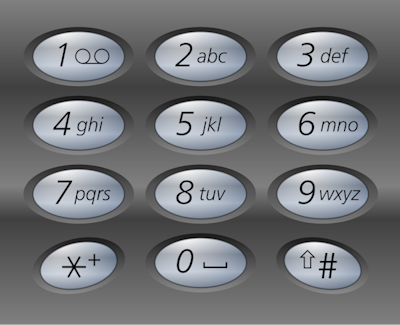

In [1]:
digits = "23"
answer = ["ad","ae","af","bd","be","bf","cd","ce","cf"]

letters_dict = {
    '2': "abc",
    '3': "def",
    '4': "ghi",
    '5': "jkl",
    '6': "mno",
    '7': "pqrs",
    '8': "tuv",
    '9': "wxyz"
}

def find_all_sequence_combinations(digits):

    def continue_or_finish_sequence(current_string, i):

        if len(current_string) == len_digits:
            digit_combinations.append(current_string)
            return

        digit = digits[i]

        if digit not in letters_dict.keys():
            raise ValueError("digit is outside range")
        
        for letter in letters_dict[digit]:
            current_string = current_string + letter
            continue_or_finish_sequence(current_string, i + 1)
            current_string = current_string[:-1]

    len_digits = len(digits)
    digit_combinations = []
    current_string = ''

    continue_or_finish_sequence(current_string, 0)

    return digit_combinations

answer = find_all_sequence_combinations(digits)
print(answer)

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


### Generation problems

**Example 1: 39. Combination Sum**

Given an array of distinct positive integers candidates and a target integer target,  
return a list of all unique combinations of candidates where the chosen numbers sum to target.  
The same number may be chosen from candidates an unlimited number of times.  
Two combinations are unique if the frequency of at least one of the chosen numbers is different. 

In [12]:
candidates = [2,3,6,7]
target = 7
answer = [[2,2,3],[7]] # the 2 can be used multiple times

def find_combos_matching_sum(candidates, target):

    def build_or_finish_combo(current_combo, current_sum, i):

        if current_sum == target:
            valid_combos.append(current_combo[:])
            return 

        len_candidates = len(candidates)

        for i in range(i, len_candidates):

            current_integer = candidates[i]
            current_sum += current_integer

            if current_sum <= target:
                current_combo.append(current_integer)
                build_or_finish_combo(current_combo, current_sum, i)
                current_combo.pop()

            current_sum -= current_integer
    
    current_sum = 0
    current_combo = []
    valid_combos = []

    build_or_finish_combo(current_combo, current_sum, 0)

    return valid_combos

answer = find_combos_matching_sum(candidates, target)
print(answer)

[[2, 2, 3], [7]]


22. Generate Parentheses  
Medium 

Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses. 

Input: n = 3
Output: ["((()))","(()())","(())()","()(())","()()()"]

In [9]:
n = 3
answer = ["((()))","(()())","(())()","()(())","()()()"]

def assemble_all_bracket_combinations(n):

    def complete_or_continue_sequence(current_sequence, n_left = 0, n_right = 0):
    
        if len(current_sequence) == len_complete:
            all_combinations.append(current_sequence)
            return

        for bracket in brackets:
            if (n_left == n and bracket == "(") or (n_left == n_right and bracket == ")"):
                pass
            else:
                current_sequence = current_sequence + bracket
                if bracket  == "(":
                    complete_or_continue_sequence(current_sequence, n_left + 1, n_right)
                if bracket == ")":
                    complete_or_continue_sequence(current_sequence, n_left, n_right + 1)
                current_sequence = current_sequence[:-1]

    len_complete = n * 2
    brackets = ["(", ")"]
    all_combinations = []
    current_sequence = ""

    complete_or_continue_sequence(current_sequence)

    return all_combinations

answer = assemble_all_bracket_combinations(n)
print(answer)

['((()))', '(()())', '(())()', '()(())', '()()()']


**967. Numbers With Same Consecutive Differences**  
Medium 

Given two integers n and k,  
return an array of all the integers of length n  
where the difference between every two consecutive digits is k.  
You may return the answer in any order.

Note that the integers should not have leading zeros. Integers as 02 and 043 are not allowed.

In [5]:
n = 3
k = 7
answer = [181, 292, 707, 818, 929]

def find_valid_combinations(n, k):

    def expand_or_complete_combo(current_combo, i):

        if i == n:
            valid_combos.append(current_combo[:])
            return

        for digit in digits:
            if (i == 0 and digit != 0) or (0 < i and abs(digit - current_combo[i - 1]) == k):
                current_combo.append(digit)
                expand_or_complete_combo(current_combo, i + 1)
                current_combo.pop()
        
    digits = [n for n in range(10)]
    valid_combos = []
    current_combo = []

    expand_or_complete_combo(current_combo, 0)

    return valid_combos

answer = find_valid_combinations(n, k)
print(answer)

[[1, 8, 1], [2, 9, 2], [7, 0, 7], [8, 1, 8], [9, 2, 9]]


**216. Combination Sum III**  
Medium  
Find all valid combinations of k numbers that sum up to n such that the following conditions are true: 

- Only numbers 1 through 9 are used.
- Each number is used at most once.

Return a list of all possible valid combinations.  
The list must not contain the same combination twice, and the combinations may be returned in any order.


In [28]:
k = 3
n = 7
answer = [[1,2,4]]

def find_integers_with_given_sum(n, k):

    def expand_or_complete_combo(current_combo, current_sum, i):

        if len(current_combo) == k and current_sum == n:
            valid_combos.append(current_combo[:])
            return

        for digit in range(i, 10):
            if len(current_combo) < k and (current_sum + digit) <= n:
                current_combo.append(digit)
                expand_or_complete_combo(current_combo, current_sum + digit, digit + 1)
                current_combo.pop()
    
    valid_combos = []
    expand_or_complete_combo(current_combo = [], current_sum = 0, i = 1)

    return valid_combos

answer = find_integers_with_given_sum(n, k)
print(answer)

[[1, 2, 4]]
